Name: Shreya Kulkarni
Project: SF salaries
CSC 570 

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math


%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
sf=pd.read_csv("Salaries.csv")

C:\Users\Karan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sf.columns

Index([u'Id', u'EmployeeName', u'JobTitle', u'BasePay', u'OvertimePay',
       u'OtherPay', u'Benefits', u'TotalPay', u'TotalPayBenefits', u'Year',
       u'Notes', u'Agency', u'Status'],
      dtype='object')

In [4]:
sf.describe


<bound method DataFrame.describe of             Id            EmployeeName  \
0            1          NATHANIEL FORD   
1            2            GARY JIMENEZ   
2            3          ALBERT PARDINI   
3            4       CHRISTOPHER CHONG   
4            5         PATRICK GARDNER   
5            6          DAVID SULLIVAN   
6            7               ALSON LEE   
7            8           DAVID KUSHNER   
8            9          MICHAEL MORRIS   
9           10      JOANNE HAYES-WHITE   
10          11           ARTHUR KENNEY   
11          12        PATRICIA JACKSON   
12          13       EDWARD HARRINGTON   
13          14             JOHN MARTIN   
14          15          DAVID FRANKLIN   
15          16         RICHARD CORRIEA   
16          17                AMY HART   
17          18          SEBASTIAN WONG   
18          19              MARTY ROSS   
19          20           ELLEN MOFFATT   
20          21              VENUS AZAR   
21          22            JUDY MELINEK  

In [5]:
sf

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602,8601,189083,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492,89062.9,134426,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256577,0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176933,86362.7,40132.2,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262,0,17115.7,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [6]:
sf.describe()

C:\Users\Karan\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [7]:
def categorical_variable(df):
        """
        Just like .describe(), but returns the results for
        categorical variables only.
        """
        from IPython.display import display, HTML
        display(HTML(sf[sf.columns[sf.dtypes == "object"]].describe().to_html()))

In [8]:
categorical_variable(sf)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,Agency,Status
count,148654,148654,148049.0,148654.0,148654.0,112495.0,148654,38119
unique,110811,2159,109900.0,66555.0,84968.0,99635.0,1,2
top,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,San Francisco,FT
freq,13,7036,875.0,66103.0,35218.0,1053.0,148654,22334


In [9]:
sf.BasePay.value_counts()

0.0          875
0.00         423
54703.00     327
55026.0      297
48472.4      210
65448.0      153
121068.0     152
68391.0      152
88374.0      151
51492.8      143
94191.0      137
116584.0     127
105934.66    117
105934.67    114
51502.0      110
67948.0      109
63995.0      103
60206.6      101
86840.0       95
105934.65     94
72144.0       86
116956.71     85
81830.0       84
79222.0       82
88062.0       82
112703.74     79
83160.0       77
61128.0       77
109783.86     74
57630.6       73
            ... 
71263.27       1
29672.65       1
11547.16       1
17714.33       1
79192.2        1
118073.7       1
8546.80        1
56075.89       1
47299.47       1
48475.71       1
30254.4        1
157975.9       1
50878.93       1
75984.53       1
17678.46       1
91978.82       1
55462.19       1
84814.03       1
76558.9        1
87298.1        1
422.11         1
9991.53        1
127207.77      1
97461.09       1
51751.4        1
93325.99       1
154575.03      1
111890.97     

In [10]:
sf.TotalPay.value_counts()

0.00         368
18594.00      82
123290.70     56
132242.50     49
105489.00     42
17085.00      39
50913.30      39
1196.00       38
2195.08       38
46175.10      37
23757.50      35
250.00        34
2115.00       33
66096.00      33
40988.18      33
24656.00      31
1199.90       30
125.00        28
150.00        28
168419.82     27
65448.00      27
1200.00       26
300.00        26
57630.60      24
53539.40      24
72144.00      24
83160.00      24
1242.00       23
97461.00      23
743.90        23
            ... 
24281.50       1
7078.25        1
62513.11       1
83121.50       1
19285.50       1
9534.75        1
64263.17       1
63596.22       1
9771.25        1
139986.79      1
57507.43       1
16495.76       1
104502.84      1
896.25         1
14876.75       1
3937.44        1
50191.32       1
6800.75        1
79856.99       1
152317.82      1
59662.70       1
65882.06       1
95330.03       1
76403.07       1
94264.16       1
80032.09       1
5855.02        1
100268.68     

In [11]:
sf.Benefits.value_counts()


0.0         1053
0.00         681
7959.18      348
4659.36      107
25699.2       83
37055.22      82
27052.98      70
37025.18      60
36097.33      57
34150.93      53
38280.39      51
35884.33      51
39396.66      49
36412.57      47
35445.1       44
25954.76      44
7464.70       43
37040.2       43
26642.48      43
41406.59      40
41858.98      40
35732.23      39
41366.1       38
450.37        37
7065.1        36
18323.88      36
24669.82      35
35703.87      35
35134.88      35
24682.65      35
            ... 
6290.33        1
39584.08       1
1747.87        1
3591.55        1
18.22          1
38492.87       1
40898.56       1
11597.34       1
34503.83       1
45580.62       1
52.23          1
31825.31       1
31622.58       1
28792.91       1
46336.17       1
57423.34       1
34175.96       1
23496.54       1
32192.81       1
52069.99       1
19004.42       1
58397.07       1
26802.16       1
34100.41       1
75.98          1
2090.91        1
32012.15       1
8201.43       

In [12]:
numeric_variables = list(sf.dtypes[sf.dtypes != "object"].index)
sf[numeric_variables].head()

,Id,TotalPay,TotalPayBenefits,Year,Notes
0,1,567595.43,567595.43,2011,NaN
1,2,538909.28,538909.28,2011,NaN
2,3,335279.91,335279.91,2011,NaN
3,4,332343.61,332343.61,2011,NaN
4,5,326373.19,326373.19,2011,NaN


** *EDA for Id* **

In [13]:
sf.Id.describe()

count    148654.000000
mean      74327.500000
std       42912.857795
min           1.000000
25%       37164.250000
50%       74327.500000
75%      111490.750000
max      148654.000000
Name: Id, dtype: float64

In [14]:
sf[sf.Id.isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


** *EDA for TotalPay* **


In [15]:
sf[sf.TotalPay.isnull()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status


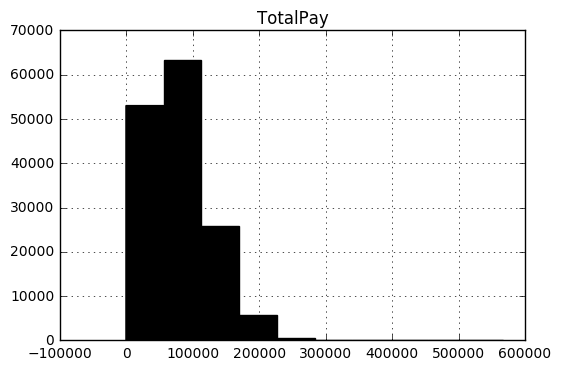

In [16]:
sf_TP=sf.TotalPay.hist(bins=10 , color = "Black")
sf_TP.set_title("TotalPay")

** *EDA for TotalPayBenefits* **


In [17]:
sf.TotalPayBenefits.describe()

count    148654.000000
mean      93692.554811
std       62793.533483
min        -618.130000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64

In [18]:
sf.TotalPayBenefits.describe()

count    148654.000000
mean      93692.554811
std       62793.533483
min        -618.130000
25%       44065.650000
50%       92404.090000
75%      132876.450000
max      567595.430000
Name: TotalPayBenefits, dtype: float64

In [19]:
sf.TotalPayBenefits.isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
148624    False
148625    False
148626    False
148627    False
148628    False
148629    False
148630    False
148631    False
148632    False
148633    False
148634    False
148635    False
148636    False
148637    False
148638    False
148639    False
148640    False
148641    False
148642    False
148643    False
148644    False
148645    False
148646    False
148647    False
148648    False
148649    False
148650    False
148651    False
148652    False
148653    False
Name: TotalPayBenefits, 

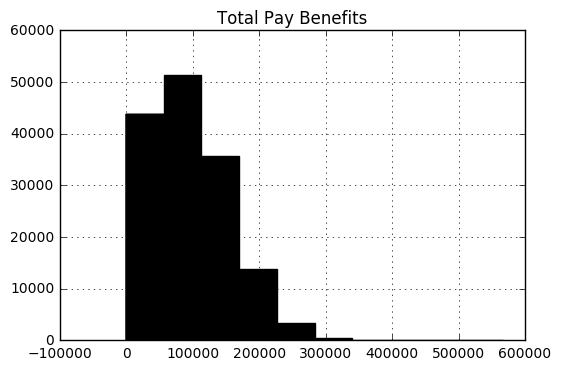

In [20]:
sf_TPB=sf.TotalPayBenefits.hist(bins=10 , color = "Black")
sf_TPB.set_title("Total Pay Benefits")

** *EDA for Year* ** 

In [21]:
sf.Year.describe()

count    148654.000000
mean       2012.522643
std           1.117538
min        2011.000000
25%        2012.000000
50%        2013.000000
75%        2014.000000
max        2014.000000
Name: Year, dtype: float64

In [22]:
sf.Year.value_counts()

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

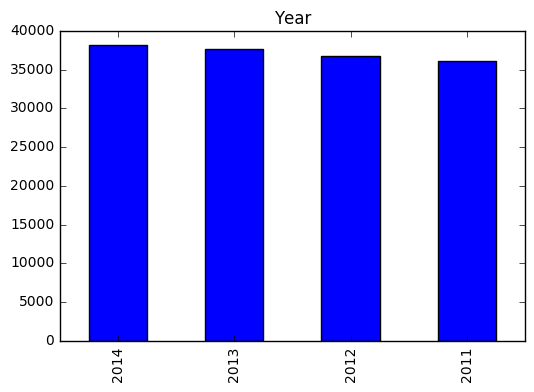

In [23]:

sf_year =sf.Year.value_counts().plot(kind = 'bar',color = "Blue" )
sf_year.set_title("Year")


** *EDA for Notes:* **

In [24]:
sf.Notes.value_counts()

Series([], Name: Notes, dtype: int64)

Notes has all the values null, hence i shall go ahead and delete this column. 

In [25]:
del sf['Notes']

EDA for the categorical variables

In [26]:
categorical_variable(sf)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,Agency,Status
count,148654,148654,148049.0,148654.0,148654.0,112495.0,148654,38119
unique,110811,2159,109900.0,66555.0,84968.0,99635.0,1,2
top,Kevin Lee,Transit Operator,0.0,0.0,0.0,0.0,San Francisco,FT
freq,13,7036,875.0,66103.0,35218.0,1053.0,148654,22334


In [27]:
sf.EmployeeName.value_counts()


Kevin Lee               13
William Wong            11
Richard Lee             11
Steven Lee              11
Michael Wong             9
John Chan                9
KEVIN LEE                9
Stanley Lee              9
Victor Lee               8
William Lee              8
MICHAEL LEE              8
David Wong               8
RICHARD LEE              8
DAVID WONG               8
Michael Lee              7
STANLEY LEE              7
STEVEN LEE               7
Michael A Johnson        7
MICHAEL BROWN            7
Michael Brown            7
WILLIAM WONG             7
John Miller              7
Sandy Wong               7
Amelie E Bullard         7
Evelyn M Palomares       6
WILLIAM LEE              6
JOHN CHAN                6
Michael Smith            6
Nancy Wong               6
Emelita M Hathaway       6
                        ..
ROBERT MAMMONE           1
MILDRED ZARAGOZA         1
Fidel Amezcua Jr         1
Vincent Siu              1
Steven P Crocker         1
Serafin Tiomico          1
R

We wont be using name as a part of our model 

In [28]:
del sf['EmployeeName']

EDA for JobTitle

In [29]:
sf.JobTitle.value_counts()

Transit Operator                                      7036
Special Nurse                                         4389
Registered Nurse                                      3736
Public Svc Aide-Public Works                          2518
Police Officer 3                                      2421
Custodian                                             2418
TRANSIT OPERATOR                                      2388
Firefighter                                           2359
Recreation Leader                                     1971
Patient Care Assistant                                1945
Deputy Sheriff                                        1933
Police Officer                                        1476
SPECIAL NURSE                                         1402
Public Service Trainee                                1328
REGISTERED NURSE                                      1219
Police Officer 2                                      1141
Attorney (Civil/Criminal)                             11

In [30]:
sf.JobTitle.describe()

count               148654
unique                2159
top       Transit Operator
freq                  7036
Name: JobTitle, dtype: object

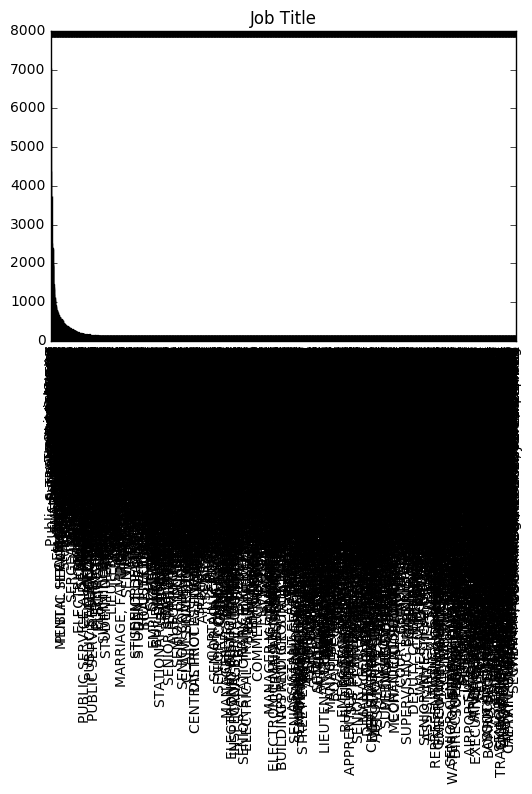

In [31]:
sf_JT = sf.JobTitle.value_counts().plot(kind = 'bar')
sf_JT.set_title("Job Title")


EDA for BasePay  

In [32]:
sf.BasePay.value_counts()

0.0          875
0.00         423
54703.00     327
55026.0      297
48472.4      210
65448.0      153
121068.0     152
68391.0      152
88374.0      151
51492.8      143
94191.0      137
116584.0     127
105934.66    117
105934.67    114
51502.0      110
67948.0      109
63995.0      103
60206.6      101
86840.0       95
105934.65     94
72144.0       86
116956.71     85
81830.0       84
79222.0       82
88062.0       82
112703.74     79
83160.0       77
61128.0       77
109783.86     74
57630.6       73
            ... 
71263.27       1
29672.65       1
11547.16       1
17714.33       1
79192.2        1
118073.7       1
8546.80        1
56075.89       1
47299.47       1
48475.71       1
30254.4        1
157975.9       1
50878.93       1
75984.53       1
17678.46       1
91978.82       1
55462.19       1
84814.03       1
76558.9        1
87298.1        1
422.11         1
9991.53        1
127207.77      1
97461.09       1
51751.4        1
93325.99       1
154575.03      1
111890.97     

In [33]:
sf.BasePay.describe()

count     148049.0
unique    109900.0
top            0.0
freq         875.0
Name: BasePay, dtype: float64

In [34]:
sf.BasePay.isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
148624    False
148625    False
148626    False
148627    False
148628    False
148629    False
148630    False
148631    False
148632    False
148633    False
148634    False
148635    False
148636    False
148637    False
148638    False
148639    False
148640    False
148641    False
148642    False
148643    False
148644    False
148645    False
148646    False
148647    False
148648    False
148649    False
148650    False
148651    False
148652    False
148653    False
Name: BasePay, dtype: bo

*Here, deletion of Id is done, because Id shall in no way contribute in predicting totalpay. *

In [35]:
del sf['Id']

** *EDA for Benefits* **

In [36]:
sf.Benefits.value_counts()

0.0         1053
0.00         681
7959.18      348
4659.36      107
25699.2       83
37055.22      82
27052.98      70
37025.18      60
36097.33      57
34150.93      53
38280.39      51
35884.33      51
39396.66      49
36412.57      47
35445.1       44
25954.76      44
7464.70       43
37040.2       43
26642.48      43
41406.59      40
41858.98      40
35732.23      39
41366.1       38
450.37        37
7065.1        36
18323.88      36
24669.82      35
35703.87      35
35134.88      35
24682.65      35
            ... 
6290.33        1
39584.08       1
1747.87        1
3591.55        1
18.22          1
38492.87       1
40898.56       1
11597.34       1
34503.83       1
45580.62       1
52.23          1
31825.31       1
31622.58       1
28792.91       1
46336.17       1
57423.34       1
34175.96       1
23496.54       1
32192.81       1
52069.99       1
19004.42       1
58397.07       1
26802.16       1
34100.41       1
75.98          1
2090.91        1
32012.15       1
8201.43       

In [37]:
sf.Benefits.describe()

count     112495.0
unique     99635.0
top            0.0
freq        1053.0
Name: Benefits, dtype: float64

In [38]:
sf.Benefits.isnull()

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
148624    False
148625    False
148626    False
148627    False
148628    False
148629    False
148630    False
148631    False
148632    False
148633    False
148634    False
148635    False
148636    False
148637    False
148638    False
148639    False
148640    False
148641    False
148642    False
148643    False
148644    False
148645    False
148646    False
148647    False
148648    False
148649    False
148650    False
148651    False
148652    False
148653    False
Name: Benefits, dtype: b

In [39]:
sf['Benefits'] = sf['Benefits'].convert_objects(convert_numeric=True)

C:\Users\Karan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [40]:
mean = sf["Benefits"].mean()

sf["Benefits"] = sf["Benefits"].fillna(mean)

In [41]:
sf.Benefits.isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
148624    False
148625    False
148626    False
148627    False
148628    False
148629    False
148630    False
148631    False
148632    False
148633    False
148634    False
148635    False
148636    False
148637    False
148638    False
148639    False
148640    False
148641    False
148642    False
148643    False
148644    False
148645    False
148646    False
148647    False
148648    False
148649    False
148650    False
148651    False
148652    False
148653    False
Name: Benefits, dtype: b

In [42]:
sf.dtypes


JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
Status               object
dtype: object

* **EDA for BasePay for converting its data type. and for handling its missing types* **

In [43]:
sf.BasePay.describe()

count     148049.0
unique    109900.0
top            0.0
freq         875.0
Name: BasePay, dtype: float64

In [44]:
sf.BasePay.value_counts()

0.0          875
0.00         423
54703.00     327
55026.0      297
48472.4      210
65448.0      153
121068.0     152
68391.0      152
88374.0      151
51492.8      143
94191.0      137
116584.0     127
105934.66    117
105934.67    114
51502.0      110
67948.0      109
63995.0      103
60206.6      101
86840.0       95
105934.65     94
72144.0       86
116956.71     85
81830.0       84
79222.0       82
88062.0       82
112703.74     79
83160.0       77
61128.0       77
109783.86     74
57630.6       73
            ... 
71263.27       1
29672.65       1
11547.16       1
17714.33       1
79192.2        1
118073.7       1
8546.80        1
56075.89       1
47299.47       1
48475.71       1
30254.4        1
157975.9       1
50878.93       1
75984.53       1
17678.46       1
91978.82       1
55462.19       1
84814.03       1
76558.9        1
87298.1        1
422.11         1
9991.53        1
127207.77      1
97461.09       1
51751.4        1
93325.99       1
154575.03      1
111890.97     

In [45]:
sf.BasePay.isnull()

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
148624    False
148625    False
148626    False
148627    False
148628    False
148629    False
148630    False
148631    False
148632    False
148633    False
148634    False
148635    False
148636    False
148637    False
148638    False
148639    False
148640    False
148641    False
148642    False
148643    False
148644    False
148645    False
148646    False
148647    False
148648    False
148649    False
148650    False
148651    False
148652    False
148653    False
Name: BasePay, dtype: bo

In [46]:
sf['BasePay'] = sf['BasePay'].convert_objects(convert_numeric=True)

C:\Users\Karan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [47]:
mean = sf["BasePay"].mean()

sf["BasePay"] = sf["BasePay"].fillna(mean)

In [48]:
sf.dtypes


JobTitle             object
BasePay             float64
OvertimePay          object
OtherPay             object
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Agency               object
Status               object
dtype: object

In [49]:
sf['OvertimePay'] = sf['OvertimePay'].convert_objects(convert_numeric=True)

C:\Users\Karan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [50]:
mean = sf["OvertimePay"].mean()

sf["OvertimePay"] = sf["OvertimePay"].fillna(mean)

In [51]:
categorical_variable = ['JobTitle', 'Status']

for variable in categorical_variable:
    # Fill missing data with the word "Missing"
    sf[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(sf[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    sf = pd.concat([sf, dummies], axis=1)
    sf.drop([variable], axis=1, inplace=True)

In [52]:
sf['OtherPay'] = sf['OtherPay'].convert_objects(convert_numeric=True)

C:\Users\Karan\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [53]:
mean = sf["OtherPay"].mean()

sf["OtherPay"] = sf["OPay"].fillna(mean)

In [54]:
sf.isnull().any()

BasePay                                                        False
OvertimePay                                                    False
OtherPay                                                       False
Benefits                                                       False
TotalPay                                                       False
TotalPayBenefits                                               False
Year                                                           False
Agency                                                         False
JobTitle_ACCOUNT CLERK                                         False
JobTitle_ACCOUNTANT                                            False
JobTitle_ACCOUNTANT INTERN                                     False
JobTitle_ACPO,JuvP, Juv Prob (SFERS)                           False
JobTitle_ACUPUNCTURIST                                         False
JobTitle_ADMINISTRATIVE ANALYST                                False
JobTitle_ADMINISTRATIVE ANALYST II

In [55]:
sf.Agency.value_counts()

San Francisco    148654
Name: Agency, dtype: int64

In [56]:
del sf['Agency']

** *Deleting Agency because there is only value, i.e is San Fransisco* **

In [59]:
sf.dtypes

BasePay                                                        float64
OvertimePay                                                    float64
OtherPay                                                       float64
Benefits                                                       float64
TotalPay                                                       float64
TotalPayBenefits                                               float64
Year                                                             int64
JobTitle_ACCOUNT CLERK                                         float64
JobTitle_ACCOUNTANT                                            float64
JobTitle_ACCOUNTANT INTERN                                     float64
JobTitle_ACPO,JuvP, Juv Prob (SFERS)                           float64
JobTitle_ACUPUNCTURIST                                         float64
JobTitle_ADMINISTRATIVE ANALYST                                float64
JobTitle_ADMINISTRATIVE ANALYST II                             float64
JobTit

In [60]:
sf.isnull().any()

BasePay                                                        False
OvertimePay                                                    False
OtherPay                                                       False
Benefits                                                       False
TotalPay                                                       False
TotalPayBenefits                                               False
Year                                                           False
JobTitle_ACCOUNT CLERK                                         False
JobTitle_ACCOUNTANT                                            False
JobTitle_ACCOUNTANT INTERN                                     False
JobTitle_ACPO,JuvP, Juv Prob (SFERS)                           False
JobTitle_ACUPUNCTURIST                                         False
JobTitle_ADMINISTRATIVE ANALYST                                False
JobTitle_ADMINISTRATIVE ANALYST II                             False
JobTitle_ADMINISTRATIVE ANALYST II

In [61]:
y = sf.pop("TotalPay")


In [62]:
X_train, X_test, y_train, y_test = train_test_split(sf, y, test_size=.2, random_state=42)


** *Random Forest Regressor  Model Implementation:* ** 

In [63]:

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=400, oob_score=True,n_jobs=-1, random_state=50,max_features="auto",min_samples_split=2)
model.fit(sf, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=-1, oob_score=True, random_state=50,
           verbose=0, warm_start=False)

In [64]:
model.oob_score_


0.9998545876406868

** *Performing Hyperparameter Optimization : Grid Search* ** 
The concept behind performing Grid Search is to estimate the best features which shall provide us with a better accuracy percentage. The oob score which I am getting is pretty high for a model.  I tried performing a grid search, but my system wouldnt handle.
    

In [ ]:
n_estimators = [300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [1,2,3,4]


rfc = RandomForestRegressor(n_jobs=1)
#Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
                              
estimator.fit(X_train, y_train)
estimator.best_estimator_
best_rfc = estimator.best_estimator_

Accuracy:
Here we shall find out how accurate our model is. Accuracy is the prediction of the number of correct predictions from all the predictions from all the predictions made.
Here, we are measuring the accuracy for the model after Grid Search.
Accuracy is the number of accurate answers divided by the total number of answers.

In [ ]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

** *AUC: Area Under the Curve* **

In [ ]:

correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

In [ ]:
print classification_report(y_test, best_rfc.predict(X_test))


In [ ]:
print confusion_matrix(y_test, best_rfc.predict(X_test))


In [ ]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

In [ ]:

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()